In [66]:
import pandas as pd
import matplotlib.pyplot as plt

%pylab inline
%matplotlib inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [67]:
bucket = 'idslykpj4/dataset'
data_key = 'train.csv'
data_location = 's3://{}/{}'.format(bucket, data_key)
df = pd.read_csv(data_location)

In [68]:
df

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ...    ...   
886                              Montvila, Rev. Juozas    male  27.0      0   
887                       Graham, Miss. Margaret Edith  female  19.0      0   
888           Johnston, Miss. Catherine Helen "Carrie"  female   NaN      1   
889                              Behr, Mr. Karl Howell    male  26.0      0   
890                                Dooley, Mr. Patrick    male  32.0      0   

     Parch            Ticket     Fare Cabin Embarked  
0        0         A/5 21171   7.2500   NaN        S  
1        0          PC 17599  71.2833   C85        C  
2        0  STON/O2. 3101282   7.9250   NaN        S  
3        0            113803  53.1000  C123        S  
4        0            373450   8.0500   NaN        S  
..     ...               ...      ...   ...      ...  
886      0            211536  13.0000   NaN        S  
887      0            112053  30.0000   B42        S  
888      2        W./C. 6607  23.4500   NaN        S  
889      0            111369  30.0000  C148        C  
890      0            370376   7.7500   NaN        Q  

[891 rows x 12 columns]

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [70]:
print(df.dtypes)

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


In [71]:
df.Survived.value_counts()


0    549
1    342
Name: Survived, dtype: int64

In [72]:
df.Sex.value_counts()


male      577
female    314
Name: Sex, dtype: int64

<AxesSubplot: >

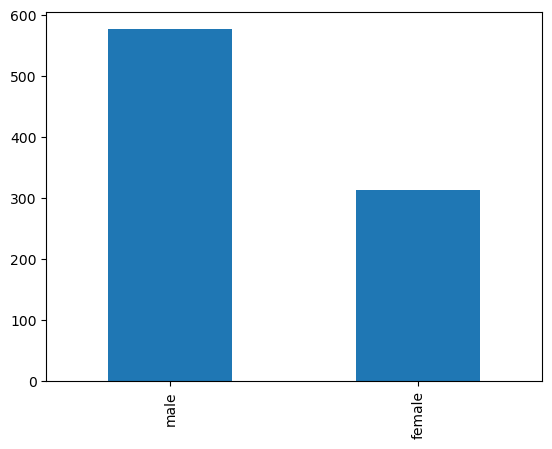

In [73]:
df.Sex.value_counts().plot(kind = 'bar')


<AxesSubplot: >

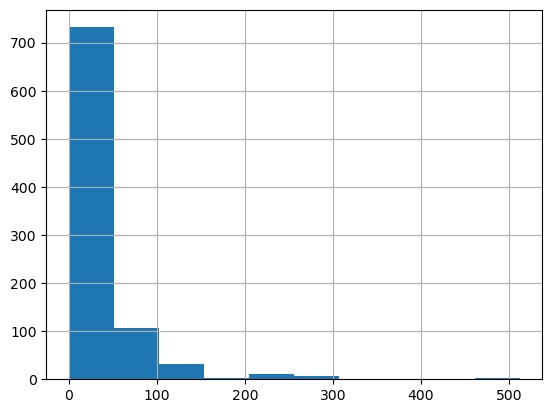

In [74]:
df.Fare.hist()

In [75]:
import seaborn as sns
sns.set()

In [76]:
df_copy = df
def bar_chart(feature):
    survived = df_copy[df_copy['Survived']==1][feature].value_counts()
    dead = df_copy[df_copy['Survived']==0][feature].value_counts()
    df_new = pd.DataFrame([survived, dead])
    df_new.index = ['Survived', 'Dead']
    df_new.plot(kind = 'bar', stacked=True, figsize=(10, 5))

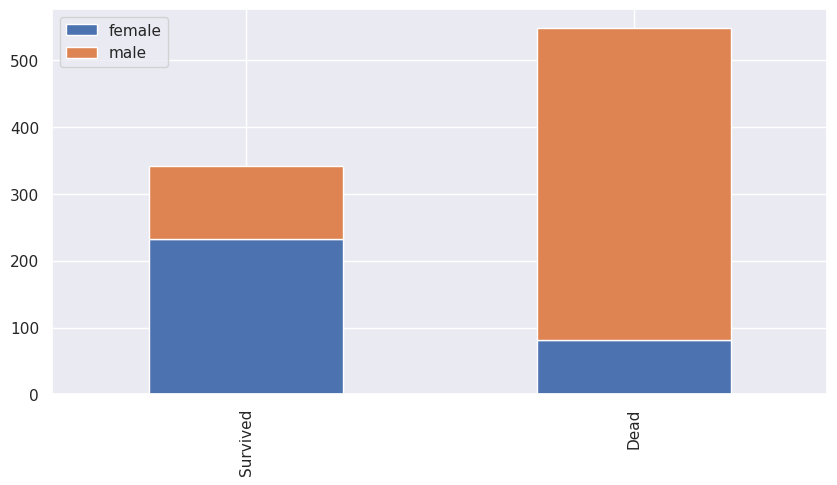

In [77]:
bar_chart('Sex')

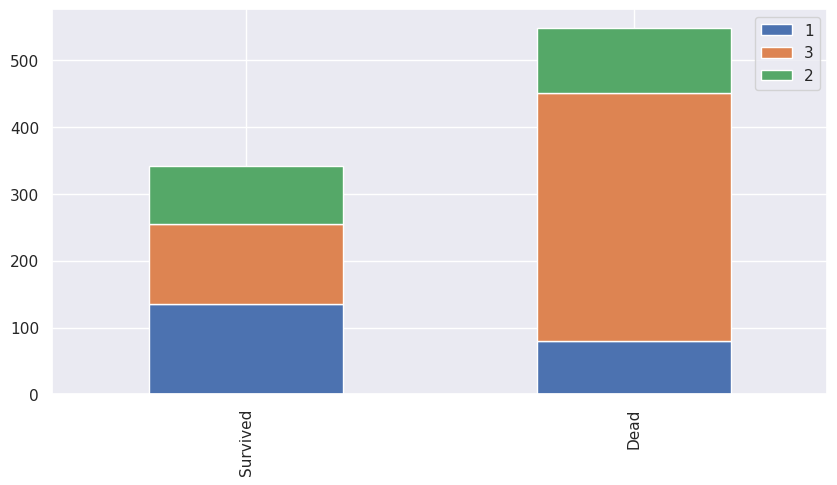

In [78]:
bar_chart('Pclass')

In [79]:
df_new = [df]
for dataset in df_new:
    dataset['Title'] = dataset['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

In [80]:
df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked Title  
0      0         A/5 21171   7.2500   NaN        S    Mr  
1      0          PC 17599  71.2833   C85        C   Mrs  
2      0  STON/O2. 3101282   7.9250   NaN        S  Miss  
3      0            113803  53.1000  C123        S   Mrs  
4      0            373450   8.0500   NaN        S    Mr

In [81]:
df['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: Title, dtype: int64

In [82]:
title_mapping = {"Mr" : 0, "Miss" : 1, "Mrs" : 2, "Master" : 3, "Dr" : 3, "Rev" : 3, "Col" : 3, "Major" : 3, "Mlle" : 3, "Countess" : 3, "Master" : 3, "Lady" : 3, "Jonkheer" : 3, "Don" : 3, "Dona" : 3, "Mme" : 3, "Capt" : 3, "Sir" : 3}
for dataset in df_new:
    dataset['Title'] = dataset['Title'].map(title_mapping)

In [83]:
df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  Title  
0      0         A/5 21171   7.2500   NaN        S    0.0  
1      0          PC 17599  71.2833   C85        C    2.0  
2      0  STON/O2. 3101282   7.9250   NaN        S    1.0  
3      0            113803  53.1000  C123        S    2.0  
4      0            373450   8.0500   NaN        S    0.0

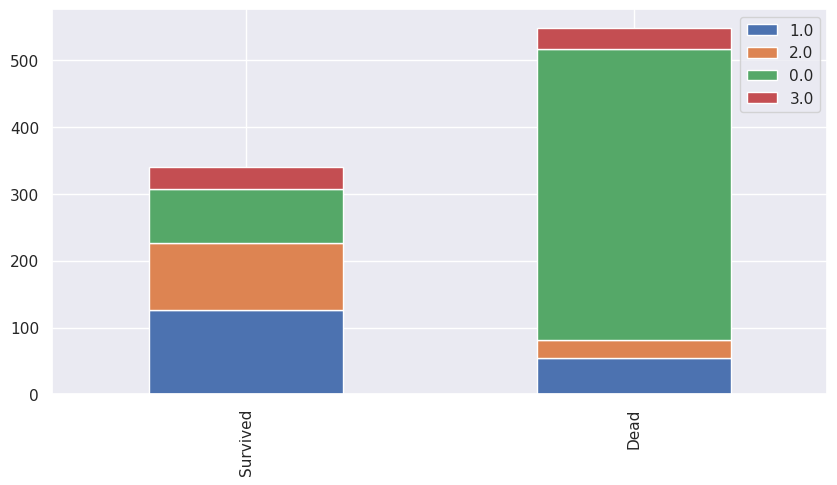

In [84]:
bar_chart('Title')

In [85]:
df.Sex.replace(['male', 'female'], [1, 0], inplace=True)

In [86]:
df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name  Sex   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris    1  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...    0  38.0      1      0   
2                             Heikkinen, Miss. Laina    0  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)    0  35.0      1      0   
4                           Allen, Mr. William Henry    1  35.0      0      0   

             Ticket     Fare Cabin Embarked  Title  
0         A/5 21171   7.2500   NaN        S    0.0  
1          PC 17599  71.2833   C85        C    2.0  
2  STON/O2. 3101282   7.9250   NaN        S    1.0  
3            113803  53.1000  C123        S    2.0  
4            373450   8.0500   NaN        S    0.0

In [87]:
df.shape

(891, 13)

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  Title        890 non-null    float64
dtypes: float64(3), int64(6), object(4)
memory usage: 90.6+ KB


In [89]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Title            1
dtype: int64

In [90]:
missing_ages = df[df['Age'].isnull()]

In [91]:
missing_ages

PassengerId  Survived  Pclass                                      Name  \
5              6         0       3                          Moran, Mr. James   
17            18         1       2              Williams, Mr. Charles Eugene   
19            20         1       3                   Masselmani, Mrs. Fatima   
26            27         0       3                   Emir, Mr. Farred Chehab   
28            29         1       3             O'Dwyer, Miss. Ellen "Nellie"   
..           ...       ...     ...                                       ...   
859          860         0       3                          Razi, Mr. Raihed   
863          864         0       3         Sage, Miss. Dorothy Edith "Dolly"   
868          869         0       3               van Melkebeke, Mr. Philemon   
878          879         0       3                        Laleff, Mr. Kristo   
888          889         0       3  Johnston, Miss. Catherine Helen "Carrie"   

     Sex  Age  SibSp  Parch      Ticket     Fare Cabin Embarked  Title  
5      1  NaN      0      0      330877   8.4583   NaN        Q    0.0  
17     1  NaN      0      0      244373  13.0000   NaN        S    0.0  
19     0  NaN      0      0        2649   7.2250   NaN        C    2.0  
26     1  NaN      0      0        2631   7.2250   NaN        C    0.0  
28     0  NaN      0      0      330959   7.8792   NaN        Q    1.0  
..   ...  ...    ...    ...         ...      ...   ...      ...    ...  
859    1  NaN      0      0        2629   7.2292   NaN        C    0.0  
863    0  NaN      8      2    CA. 2343  69.5500   NaN        S    1.0  
868    1  NaN      0      0      345777   9.5000   NaN        S    0.0  
878    1  NaN      0      0      349217   7.8958   NaN        S    0.0  
888    0  NaN      1      2  W./C. 6607  23.4500   NaN        S    1.0  

[177 rows x 13 columns]

In [92]:
mean_ages = df.groupby(['Sex', 'Pclass'])['Age'].mean()

In [93]:
mean_ages

Sex  Pclass
0    1         34.611765
     2         28.722973
     3         21.750000
1    1         41.281386
     2         30.740707
     3         26.507589
Name: Age, dtype: float64

In [94]:
def fill_nan_ages(row):
    if pd.isnull(row['Age']):
        return mean_ages[row['Sex'], row['Pclass']]
    else:
        return row['Age']

In [95]:
df['Age'] = df.apply(fill_nan_ages, axis=1)

In [96]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Title            1
dtype: int64

In [97]:
for dataset in df_new:
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 26) , 'Age'] = 1
    dataset.loc[(dataset['Age'] > 26) & (dataset['Age'] <= 36), 'Age'] = 2
    dataset.loc[ (dataset['Age'] > 36) & (dataset['Age'] <= 62), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 62, 'Age'] = 4

In [98]:
df

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name  Sex  Age  SibSp  \
0                              Braund, Mr. Owen Harris    1  1.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...    0  3.0      1   
2                               Heikkinen, Miss. Laina    0  1.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)    0  2.0      1   
4                             Allen, Mr. William Henry    1  2.0      0   
..                                                 ...  ...  ...    ...   
886                              Montvila, Rev. Juozas    1  2.0      0   
887                       Graham, Miss. Margaret Edith    0  1.0      0   
888           Johnston, Miss. Catherine Helen "Carrie"    0  1.0      1   
889                              Behr, Mr. Karl Howell    1  1.0      0   
890                                Dooley, Mr. Patrick    1  2.0      0   

     Parch            Ticket     Fare Cabin Embarked  Title  
0        0         A/5 21171   7.2500   NaN        S    0.0  
1        0          PC 17599  71.2833   C85        C    2.0  
2        0  STON/O2. 3101282   7.9250   NaN        S    1.0  
3        0            113803  53.1000  C123        S    2.0  
4        0            373450   8.0500   NaN        S    0.0  
..     ...               ...      ...   ...      ...    ...  
886      0            211536  13.0000   NaN        S    3.0  
887      0            112053  30.0000   B42        S    1.0  
888      2        W./C. 6607  23.4500   NaN        S    1.0  
889      0            111369  30.0000  C148        C    0.0  
890      0            370376   7.7500   NaN        Q    0.0  

[891 rows x 13 columns]

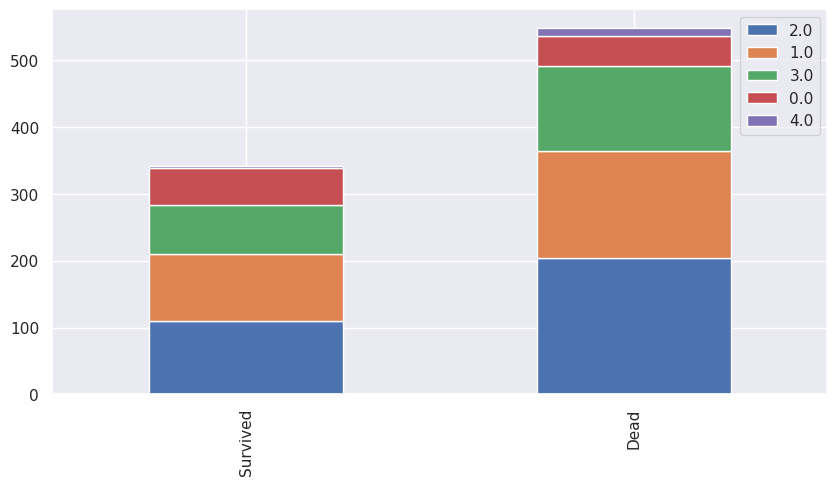

In [99]:
bar_chart('Age')

In [100]:
columns_toDrop = ['PassengerId', 'Name', 'Ticket', 'Cabin', 'Embarked' ]
df = df.drop(columns = columns_toDrop)

In [101]:
df

Survived  Pclass  Sex  Age  SibSp  Parch     Fare  Title
0           0       3    1  1.0      1      0   7.2500    0.0
1           1       1    0  3.0      1      0  71.2833    2.0
2           1       3    0  1.0      0      0   7.9250    1.0
3           1       1    0  2.0      1      0  53.1000    2.0
4           0       3    1  2.0      0      0   8.0500    0.0
..        ...     ...  ...  ...    ...    ...      ...    ...
886         0       2    1  2.0      0      0  13.0000    3.0
887         1       1    0  1.0      0      0  30.0000    1.0
888         0       3    0  1.0      1      2  23.4500    1.0
889         1       1    1  1.0      0      0  30.0000    0.0
890         0       3    1  2.0      0      0   7.7500    0.0

[891 rows x 8 columns]

In [117]:
num_nan = df.isna().sum().sum()
print(f"Number of NaN values: {num_nan}")
df = df.dropna()


Number of NaN values: 1


In [118]:
X = df.drop(['Survived'], axis=1)
y = df['Survived']

In [119]:
X

Pclass  Sex  Age  SibSp  Parch     Fare  Title
0         3    1  1.0      1      0   7.2500    0.0
1         1    0  3.0      1      0  71.2833    2.0
2         3    0  1.0      0      0   7.9250    1.0
3         1    0  2.0      1      0  53.1000    2.0
4         3    1  2.0      0      0   8.0500    0.0
..      ...  ...  ...    ...    ...      ...    ...
886       2    1  2.0      0      0  13.0000    3.0
887       1    0  1.0      0      0  30.0000    1.0
888       3    0  1.0      1      2  23.4500    1.0
889       1    1  1.0      0      0  30.0000    0.0
890       3    1  2.0      0      0   7.7500    0.0

[890 rows x 7 columns]

In [120]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 890, dtype: int64

In [121]:
print(f"Shape of Dependent variable X = {X.shape}")
print(f"Shape of Independent variable y = {y.shape}")

Shape of Dependent variable X = (890, 7)
Shape of Independent variable y = (890,)


In [122]:
X = X.values
y = y.values

In [123]:
X = X.astype('float32')
y = y.astype('float32')

In [124]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4)

In [125]:
print(f"Shape of X_train = {X_train.shape}")
print(f"Shape of X_test = {X_test.shape}")
print(f"Shape of y_train = {y_train.shape}")
print(f"Shape of y_test = {y_test.shape}")


Shape of X_train = (623, 7)
Shape of X_test = (267, 7)
Shape of y_train = (623,)
Shape of y_test = (267,)


In [126]:
import boto3
import sagemaker
from sagemaker import get_execution_role

sagemaker_session = sagemaker.Session()
role = sagemaker.get_execution_role()

INFO:botocore.credentials:Found credentials from IAM Role: BaseNotebookInstanceEc2InstanceRole
INFO:botocore.credentials:Found credentials from IAM Role: BaseNotebookInstanceEc2InstanceRole


In [127]:
from sagemaker import LinearLearner
bucket = 'idslykpj4/dataset'
prefix = 'sm-out'
output_path = 's3://{}/{}'.format(bucket, prefix)

linear = LinearLearner(role = role,
                      instance_count=1,
                      instance_type='ml.m4.xlarge',
                      predictor_type='binary_classifier',
                      output_path = output_path,
                      sagemaker_session = sagemaker_session,
                      epochs = 300,
                      num_models=32,
                      loss = 'logistic',
                      use_spot_instances = True,
                      max_run = 300,
                      max_wait = 600)


In [128]:
formatted_train_data = linear.record_set(X_train, labels=y_train)


In [113]:
formatted_validation_data = linear.record_set(X_test, labels=y_test, channel='validation')


In [129]:

linear.fit([formatted_train_data, formatted_validation_data])

INFO:sagemaker.image_uris:Same images used for training and inference. Defaulting to image scope: inference.
INFO:sagemaker.image_uris:Ignoring unnecessary instance type: None.
INFO:sagemaker.image_uris:Same images used for training and inference. Defaulting to image scope: inference.
INFO:sagemaker.image_uris:Ignoring unnecessary instance type: None.
INFO:sagemaker:Creating training-job with name: linear-learner-2023-04-12-18-25-22-326


2023-04-12 18:25:22 Starting - Starting the training job...
2023-04-12 18:25:47 Starting - Preparing the instances for training......
2023-04-12 18:26:43 Downloading - Downloading input data...
2023-04-12 18:27:14 Training - Downloading the training image......
2023-04-12 18:28:20 Training - Training image download completed. Training in progress....Docker entrypoint called with argument(s): train
Running default environment configuration script
[04/12/2023 18:28:40 INFO 139862630090560] Reading default configuration from /opt/amazon/lib/python3.7/site-packages/algorithm/resources/default-input.json: {'mini_batch_size': '1000', 'epochs': '15', 'feature_dim': 'auto', 'use_bias': 'true', 'binary_classifier_model_selection_criteria': 'accuracy', 'f_beta': '1.0', 'target_recall': '0.8', 'target_precision': '0.8', 'num_models': 'auto', 'num_calibration_samples': '10000000', 'init_method': 'uniform', 'init_scale': '0.07', 'init_sigma': '0.01', 'init_bias': '0.0', 'optimizer': 'auto', 'loss':

In [130]:
linear_binclass = linear.deploy(initial_instance_count=1, instance_type='ml.t2.medium')

INFO:sagemaker.image_uris:Same images used for training and inference. Defaulting to image scope: inference.
INFO:sagemaker.image_uris:Ignoring unnecessary instance type: None.
INFO:sagemaker:Creating model with name: linear-learner-2023-04-12-18-37-23-442
INFO:sagemaker:Creating endpoint-config with name linear-learner-2023-04-12-18-37-23-442
INFO:sagemaker:Creating endpoint with name linear-learner-2023-04-12-18-37-23-442


--------------!

In [132]:
from sagemaker.predictor import csv_serializer, json_deserializer

linear_binclass.ContentType = 'text/csv'
linear_binclass.serializer = csv_serializer
linear_binclass.deserializer = json_deserializer

In [133]:
result = linear_binclass.predict(X_test)
result

See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.


{'predictions': [{'score': 0.2851112186908722, 'predicted_label': 0},
  {'score': 0.6761701703071594, 'predicted_label': 1},
  {'score': 0.549076497554779, 'predicted_label': 0},
  {'score': 0.7186112403869629, 'predicted_label': 1},
  {'score': 0.2851112186908722, 'predicted_label': 0},
  {'score': 0.2902785539627075, 'predicted_label': 0},
  {'score': 0.6419474482536316, 'predicted_label': 1},
  {'score': 0.9015501141548157, 'predicted_label': 1},
  {'score': 0.10690073668956757, 'predicted_label': 0},
  {'score': 0.007556958589702845, 'predicted_label': 0},
  {'score': 0.8865446448326111, 'predicted_label': 1},
  {'score': 0.106469064950943, 'predicted_label': 0},
  {'score': 0.04860980063676834, 'predicted_label': 0},
  {'score': 0.10681995749473572, 'predicted_label': 0},
  {'score': 0.6254361867904663, 'predicted_label': 1},
  {'score': 0.6415688395500183, 'predicted_label': 1},
  {'score': 0.2518181800842285, 'predicted_label': 0},
  {'score': 0.1547703891992569, 'predicted_labe

In [134]:
predictions = np.array([r['score'] for r in result['predictions']])
predictions

array([0.28511122, 0.67617017, 0.5490765 , 0.71861124, 0.28511122,
       0.29027855, 0.64194745, 0.90155011, 0.10690074, 0.00755696,
       0.88654464, 0.10646906, 0.0486098 , 0.10681996, 0.62543619,
       0.64156884, 0.25181818, 0.15477039, 0.15558536, 0.1557838 ,
       0.69869387, 0.64338887, 0.1067436 , 0.69468153, 0.59100533,
       0.03722769, 0.20458676, 0.32635927, 0.10681996, 0.15462896,
       0.10675669, 0.10681996, 0.35730457, 0.11032907, 0.33969283,
       0.1065148 , 0.52274555, 0.1546499 , 0.37325588, 0.31005639,
       0.15491928, 0.84627068, 0.15408851, 0.10690074, 0.15462896,
       0.10722224, 0.28669572, 0.92240584, 0.20617716, 0.74349535,
       0.15481742, 0.10681996, 0.81594491, 0.64173192, 0.49072477,
       0.64156884, 0.15462896, 0.15473965, 0.87104607, 0.74804825,
       0.10647129, 0.20682943, 0.34696329, 0.20458676, 0.21984002,
       0.10690074, 0.79188013, 0.25666302, 0.65389895, 0.10633858,
       0.90090233, 0.10275384, 0.07199252, 0.29375222, 0.29122

In [136]:
ddf = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': predictions.flatten()})
ddf

Actual  Predicted
0       0.0   0.285111
1       1.0   0.676170
2       0.0   0.549076
3       1.0   0.718611
4       0.0   0.285111
..      ...        ...
262     1.0   0.919973
263     1.0   0.698694
264     0.0   0.557482
265     0.0   0.285111
266     0.0   0.154599

[267 rows x 2 columns]

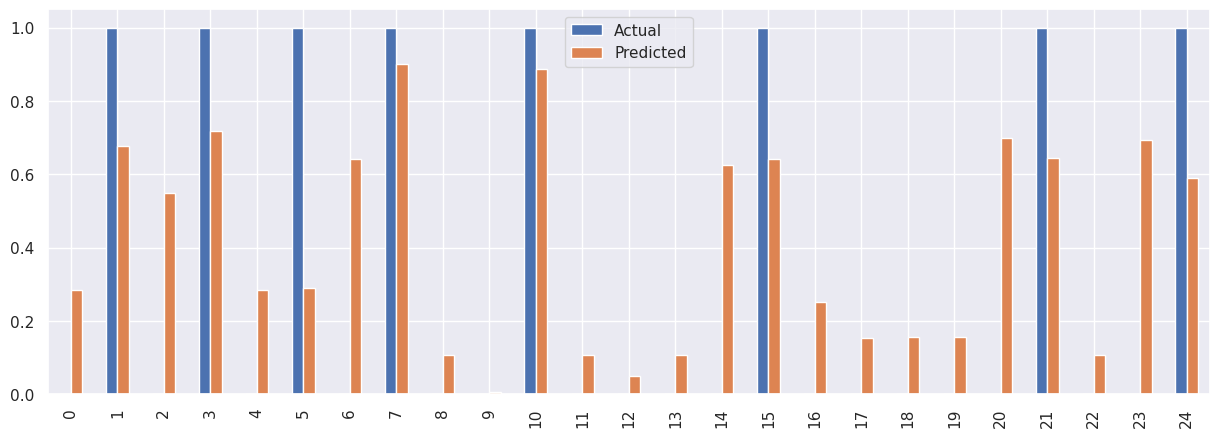

In [137]:
df1 = ddf.head(25)
df1.plot(kind='bar', figsize=(15, 5))
plt.show()